# Rental price analysis of german cities
__Creating figures__ \
__by Maximilian Hilbert__

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import geopandas as gpd
import re
from tueplots import bundles
from tueplots import cycler
from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams.update(bundles.neurips2021())
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))

__Import necessary data from src directory__

In [5]:
means_full_adj=loadtxt("../src//data//csv//infl_adjusted_means_full.csv",delimiter=",")
std_full_adj=loadtxt("../src//data///csv//infl_adjusted_std_full.csv",delimiter=",")

means_raw=loadtxt("../src//data//csv//means_raw.csv",delimiter=",")
infl=loadtxt("../src//data///csv//infl_lst.csv",delimiter=",")

In [6]:
df_raw=pd.read_csv("../src//data///csv//raw.csv", index_col="Unnamed: 0")
df_grouped=pd.read_csv("../src//data///csv//grouped.csv")
df_calc=pd.read_csv("../src//data///csv//calc_raw.csv")

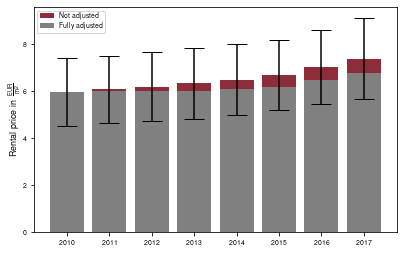

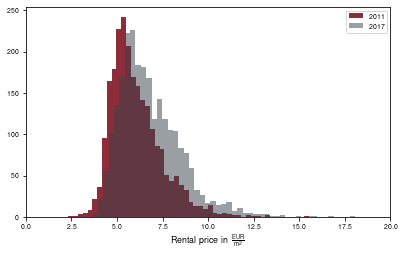

In [17]:
def plots_whole_dataset():
    years=np.arange(2010, 2018,1)
    fig,ax1=plt.subplots()

    ax1.bar(years, means_raw, yerr=std_full_adj, align="center", capsize=10, label="Not adjusted")
    ax1.bar(years, means_full_adj, align="center", color="grey", capsize=10, label="Fully adjusted")
    ax1.set_ylabel("Rental price in $\\mathrm{\\frac{EUR}{m^2}}$")
    plt.legend()


    plt.xticks(years)
    plt.yticks()
    plt.savefig("figures//Barchart_rental_prices.pdf")
    #For the histogram use mean inflation rates for the years from 2010 to 2017
    mean_infl_per_year=np.mean(infl)

    fig,ax2=plt.subplots()
    ax2.hist(df_raw["2011"], bins=50, label="2011")
    ax2.hist(df_raw["2017"].apply(lambda x: x/(mean_infl_per_year**6)), bins=75, alpha=.5, label="2017")
    ax2.set_xlabel("Rental price in $\\mathrm{\\frac{EUR}{m^2}}$")
    plt.legend()
    plt.xlim(0,20)
    
    plt.savefig("figures//Histogram_rental_prices.pdf")
plots_whole_dataset()

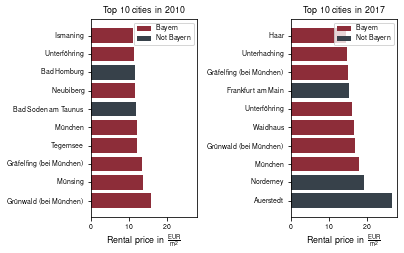

In [8]:
def barchart_city_comparison():
    #Sort by highest values for cities
    df_sorted2010=df_raw.sort_values(by=["2010"], ascending=False).head(10)
    df_sorted2017=df_raw.sort_values(by=["2017"], ascending=False).head(10)
    #look at labels and translate them to get a proper description and umlauts again
    bar_labels_german_2010=["Grünwald (bei München)","Münsing", "Gräfelfing (bei München)","Tegernsee","München","Bad Soden am Taunus",
    "Neubiberg","Bad Homburg","Unterföhring","Ismaning"]
    bar_labels_german_2017=["Auerstedt","Norderney", "München","Grünwald (bei München)", "Waidhaus", "Unterföhring",
    "Frankfurt am Main","Gräfelfing (bei München)","Unterhaching","Haar"]
    
    y=np.arange(len(bar_labels_german_2010))
    fig,axs=plt.subplots(1,2, sharex=True)
    #boolean masking to get all cities that are located in Bavaria
    mask11=df_sorted2010["state"]=="Bayern"
    mask12=df_sorted2010["state"]!="Bayern"

    mask21=df_sorted2017["state"]=="Bayern"
    mask22=df_sorted2017["state"]!="Bayern"

    x_1=df_sorted2010["2010"]

    #Plot those values and differentiate between cities located in bavaria and those which are not
    axs[0].barh(y[mask11],x_1[mask11],label="Bayern")
    axs[0].barh(y[mask12],x_1[mask12],label="Not Bayern")
    axs[0].set_title("Top 10 cities in 2010")
    axs[0].set_yticks(y)
    axs[0].set_yticklabels(labels=list(bar_labels_german_2010))
    axs[0].set_xlabel("Rental price in $\\mathrm{\\frac{EUR}{m^2}}$")
    axs[0].legend()

    x_2=df_sorted2017["2017"]
    axs[1].barh(y[mask21],x_2[mask21],label="Bayern")
    axs[1].barh(y[mask22],x_2[mask22],label="Not Bayern")

    axs[1].set_title("Top 10 cities in 2017")
    axs[1].set_yticks(y)
    axs[1].set_yticklabels(labels=list(bar_labels_german_2017))
    axs[1].set_xlabel("Rental price in $\\mathrm{\\frac{EUR}{m^2}}$")
    axs[1].legend()
    #plt.tight_layout()
    plt.savefig("figures//barchart_city_comparison.pdf",bbox_inches="tight")
barchart_city_comparison()

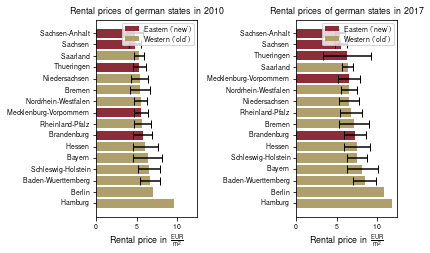

In [9]:
def plot_rentals_states():
    
    eastern_lst = ["Brandenburg",
                   "Mecklenburg-Vorpommern",
                   "Sachsen",
                   "Sachsen-Anhalt",
                   "Thueringen"]

    #This is remaining in the plotting file although there are operations on the dataframe, but in general these information are only necessary for plotting, so it stays here
    df_grouped["color"]=df_grouped.apply(lambda x: x.isin(eastern_lst).map({True: 'C0', False: 'C2'}))["state"]
    df_grouped["WestorEast"]=df_grouped.apply(lambda x: x.isin(eastern_lst).map({True: 'East', False: 'West'}))["state"]

    df_grouped_2010=df_grouped.sort_values(by=["2010"], ascending=False)
    df_grouped_2017=df_grouped.sort_values(by=["2017"], ascending=False)

    #Boolean masks for access
    mask_e_2010=df_grouped_2010["state"].isin(eastern_lst)
    mask_w_2010=~df_grouped_2010["state"].isin(eastern_lst)

    mask_e_2017=df_grouped_2017["state"].isin(eastern_lst)
    mask_w_2017=~df_grouped_2017["state"].isin(eastern_lst)

    #get datapoint from eastern/western
    western_2010=df_grouped_2010[mask_w_2010]
    eastern_2010=df_grouped_2010[mask_e_2010]

    western_2017=df_grouped_2017[mask_w_2017]
    eastern_2017=df_grouped_2017[mask_e_2017]
    
    #tickmarker
    y = np.arange(len(df_grouped_2010["state"]))
    
    fig, axs = plt.subplots(1, 2,sharex=True)

    #plot color-dependent on Eastern/Western states
    axs[0].barh(y[mask_e_2010], eastern_2010["2010"],
                 color=eastern_2010["color"].values[0], xerr=eastern_2010["std_2010"], capsize=4, ecolor="black", label="Eastern ('new')")
    axs[0].barh(y[mask_w_2010], western_2010["2010"],
                   color=western_2010["color"].values[0], xerr=western_2010["std_2010"], capsize=4,ecolor="black", label="Western ('old')")
    axs[0].set_yticks(y)
    axs[0].legend(loc=1)
    axs[0].set_yticklabels(labels=df_grouped_2010["state"])
    axs[0].set_title("Rental prices of german states in 2010")
    axs[0].set_xlabel("Rental price in $\\mathrm{\\frac{EUR}{m^2}}$")
    
    #Do the same for 2017 data
    axs[1].barh(y[df_grouped_2017["state"].isin(eastern_lst)], eastern_2017["2017"],
                 color=eastern_2017["color"].values[0], xerr=eastern_2017["std_2017"], capsize=4, label="Eastern ('new')")
    axs[1].barh(y[~df_grouped_2017["state"].isin(eastern_lst)], western_2017["2017"],
                   color=western_2017["color"].values[0], xerr=western_2017["std_2017"], capsize=4, label="Western ('old')")     

    axs[1].set_yticks(y)
    axs[1].legend(loc=1)
    axs[1].set_yticklabels(labels=df_grouped_2017["state"])
    axs[1].set_title("Rental prices of german states in 2017")
    axs[1].set_xlabel("Rental price in $\\mathrm{\\frac{EUR}{m^2}}$")

    plt.savefig("figures//barchart_state_comparison.pdf",bbox_inches="tight")
plot_rentals_states()

__Another viable depiction of the differences between german states can be seen in a heatmap created using geopandas__

__Source: http://www.diva-gis.org/datadown__

In [10]:
import geopandas as gpd
import pandas as pd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
gdf = gpd.read_file("..\\src\\data\\geo_files\\DEU_adm1.shp", encoding="utf-8")
grouped_df=pd.read_csv("..\\src\\data\\csv\\grouped.csv")

__Cleaning of excess data and rename columns in order to match to existing dataframe__

In [ ]:
def clean_and_merge(dataframe_geodata):
    dropped=dataframe_geodata.drop(["ID_0","ISO","NAME_0","ID_1","TYPE_1","ENGTYPE_1","NL_NAME_1","VARNAME_1"], axis=1)
    dropped["NAME_1"]=[re.sub("ü","ue",element) for element in dropped["NAME_1"]]
    dropped.rename(columns={"NAME_1": "state"}, inplace=True)
    merged_df=pd.merge(grouped_df, dropped,how="inner",on="state")
    return merged_df

In [ ]:
merged_df=clean_and_merge(gdf)

In [ ]:
import matplotlib.colors as colors

def plot_geodata():
    geo=gpd.GeoDataFrame(merged_df)
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    geo.plot(column='2017', ax=ax, legend=False, cmap='Greys', edgecolor="black")
    plt.axis("off")
    norm = colors.Normalize(vmin=merged_df["2017"].min(), vmax=merged_df["2017"].max())
    cbar = plt.cm.ScalarMappable(norm=norm, cmap='Greys')
    ax_cbar = fig.colorbar(cbar, ax=ax)
    # add label for the colorbar
    ax_cbar.set_label("Rental prices in $\\mathrm{\\frac{EUR}{m^2}}$", fontsize=12)
    plt.tight_layout()
    plt.savefig("figures\\geodata_2017.pdf",bbox_inches="tight")

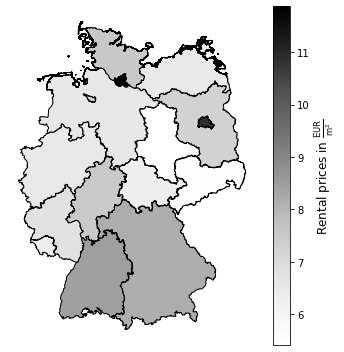

In [ ]:
plot_geodata()